# Wilkens LET model
Wilkens [1] described analytical model for LET calculation. The model is able to predict dose- and track-averaged values in the pencil proton beamlets. The calculations are limited to center-of-axis values and to liquid water.

The model is based on the Bortfeld analytical approximation of proton stopping power in water:

$$
\tilde S(r)  = \frac{r^{1/p - 1}}{p \alpha^{1/p}}
$$

where $r$ is the residual range ($R_0-z$).

Bragg-Kleeman rule which relates range of protons with its initial kinetic energy employs the same constants $p$ and $\alpha$:

$$
R_0(E) = \alpha E^p
$$

Another assumption is energy distribution of proton beamlet follows gaussian distribution at every point of the beam. Nuclear reactions are neglected in this model.

The model provides $LET$ as a function of: 
  - $z$ - depth in water (in cm)
  - $E$ - kinetic energy of proton entering water target (in MeV)
  - $\sigma_E$ - Gaussian energy spread (in MeV)


For the reference, see: 

[1] Wilkens JJ, Oelfke U. "Analytical linear energy transfer calculations for proton therapy" Med Phys. 2003 May;30(5):806-15. (DOI: 10.1118/1.1567852)

## Energy, range and stopping power

In [1]:
# jupyter hacks to print some command output (i.e. %psource) in the cell, instead of in popup
from __future__ import print_function
from IPython.core import page
page.page = print

# first some necessary python imports
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# most of the code is stored in models.py file
# we import it here and display the source code of the stopping power & range calculator class
from models import ERSCalc
%psource ERSCalc

class ERSCalc(object):
    """
    A 'calculator' class for stopping power and range of protons
    """
    alpha_cm_MeV = 0.0022
    p = 1.77

    @classmethod
    def range_cm(cls, energy_MeV):
        """
        Bragg-Kleeman rule for energy-range relationship
        Equation (8) in [1]
        """
        return cls.alpha_cm_MeV * energy_MeV ** cls.p

    @classmethod
    def stop_pow_MeV_cm(cls, resid_range_cm):
        """Bortfeld approximation for stopping power of protons"""
        return (resid_range_cm ** (1.0 / cls.p - 1.0)) / (cls.p * cls.alpha_cm_MeV ** (1.0 / cls.p))



In [3]:
# take as example some interesting proton beam energy
E_MeV = 70.0
# let's calculate range
range_cm = ERSCalc.range_cm( E_MeV )
# then at some specific depth lets obtain residual range
z_cm = 2.0
res_range_cm = range_cm - z_cm
stop_power_MeV_cm = ERSCalc.stop_pow_MeV_cm( res_range_cm )

# finally the printouts
print("Range of protons with energy {:3.1f} MeV is {:3.3} cm".format(E_MeV, range_cm))
print("Stopping power at energy {:3.1f} MeV and depth {:3.2f} cm is {:3.3} MeV/cm".format(E_MeV, z_cm, stop_power_MeV_cm))

Range of protons with energy 70.0 MeV is 4.06 cm
Stopping power at energy 70.0 MeV and depth 2.00 cm is 13.1 MeV/cm


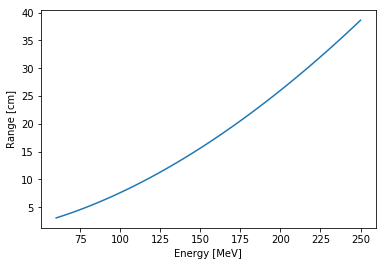

In [4]:
# some plots of range
E_MeV = np.linspace(start=60, stop=250, num=100)
range_cm = ERSCalc.range_cm( E_MeV )
plt.xlabel("Energy [MeV]")
plt.ylabel("Range [cm]")
plt.plot(E_MeV,range_cm)

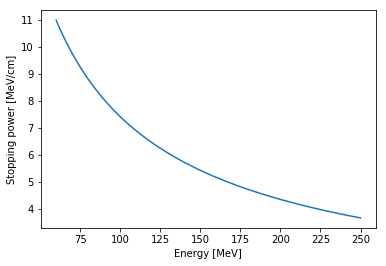

In [5]:
# some plots of stopping power
stop_power_MeV_cm = ERSCalc.stop_pow_MeV_cm( range_cm )
plt.xlabel("Energy [MeV]")
plt.ylabel("Stopping power [MeV/cm]")
plt.plot(E_MeV,stop_power_MeV_cm)

## Wilkens LET model

Wilkens LET model is based on following mathematical formalism. Dose averaged LET $L_d$ is described as:

$$
L_d(z) = \frac{\langle S^2\rangle_z}{\langle S\rangle_z}
$$

while track averaged LET $L_t$ is equal to:

$$
L_t(z) = \frac{\langle S\rangle_z}{\Phi_z}
$$


where $\langle S \rangle$ denotes stopping power averaged over an spectrum of protons with different residual range $r$. Following the formulas (A14), (A12) and (A8) from [1] we get:

$$
\Phi_z = \frac{\Phi_0}{\sqrt{2 \pi}} e^{-\zeta^2 / 4} D_{-1}(\zeta)
$$

$$
\langle S\rangle_z = \frac{\Phi_0}{\sqrt{2 \pi} \sigma R \alpha^{1/p}} \Bigg[ \sigma^{1 + 1/p} \Gamma\Big( 1 + \frac{1}{p}\Big) \tilde D_{1+1/p}(\xi, \zeta) - R \Big( \frac{R}{2}\Big)^{1/p} e^{-(\xi + \zeta)^2/8} \Bigg]
$$

$$
\langle S^2\rangle_z = \frac{\Phi_0}{\sqrt{2 \pi} \sigma R \alpha^{2/p} p (2-p)} \Bigg[ \sigma^{2/p} \Gamma\Big( \frac{2}{p}\Big) \tilde D_{2/p}(\xi, \zeta) - 2 R \Big( \frac{R}{2}\Big)^{2/p} e^{-(\xi + \zeta)^2/8} \Bigg]
$$

after simplifying we obtain:

$$
L_d(z, E, \sigma_E) = \frac{1}{\alpha^{1/p} p (2-p)} \frac{\sigma^{2/p} \Gamma\Big( \frac{2}{p}\Big) \tilde D_{2/p}(\xi, \zeta) - 2 R \Big( \frac{R}{2}\Big)^{2/p} e^{-(\xi + \zeta)^2/8}}{\sigma^{1 + 1/p} \Gamma\Big( 1 + \frac{1}{p}\Big) \tilde D_{1+1/p}(\xi, \zeta) - R \Big( \frac{R}{2}\Big)^{1/p} e^{-(\xi + \zeta)^2/8}}
$$

$$
L_t(z, E, \sigma_E) = \frac{1}{\sigma R \alpha^{1/p}} \frac{\sigma^{1 + 1/p} \Gamma\Big( 1 + \frac{1}{p}\Big) \tilde D_{1+1/p}(\xi, \zeta) - R \Big( \frac{R}{2}\Big)^{1/p} e^{-(\xi + \zeta)^2/8}}{ e^{-\zeta^2 / 4} D_{-1}(\zeta) }$$

In this formula we have following variables:
 - $\alpha = 0.0022 \ \textrm{cm MeV}^{-p}$ 
 - $p = 1.77$
 - $R = 2 \mu m$ - regularization factor
 - $\sigma = \sqrt{\sigma_{\textrm{mono}}^2 + \sigma_r^2}$ - describes Gaussian spread of range (in cm)
 - $\sigma_{\textrm{mono}} = 0.012 R_0^{0.935}$ - accounts for range straggling of monoenergetic protons (in cm)
 - $\sigma_r = \sigma_E \alpha p E^{p-1}$ - accounts for initial energy spread translated into range spread (in cm)
 - $R_0 = \alpha E^p$ - range of protons with kinetic energy $E$ (in cm)
 - $\zeta = (z - R_0) / \sigma$ - helper variable
 - $\xi = (z - R_0 - R) / \sigma$ - helper variable
 - $\Gamma$ - gamma function
 - $\tilde D_\nu(x,y) = e^{-x^2/4} D_{-\nu}(x) - e^{-y^2/4} D_{-\nu}(y)$ - helper function
 - $D_\nu$ - parabolic cylinder function

In [6]:
# lets use again models.py file and display the implementation of Wilkens model
from models import WilkensLET
%psource WilkensLET

class WilkensLET(object):
    """
    Analytical LET model implementation following
    [1] Wilkens JJ, Oelfke U. "Analytical linear energy transfer calculations for proton therapy"
    Med Phys. 2003 May;30(5):806-15. (DOI: 10.1118/1.1567852)
    """
    r_cm = 2e-4  # 2 um regularisation

    @staticmethod
    def parabolic_integral(nu, t):
        """
        evaluates precisely e^(-x^2/4)*D_(-nu)(x)
        """
        return np.array([float(mp.exp(-(v ** 2) / 4.0) * mp.pcfd(-nu, v)) for v in t])

    @staticmethod
    def exponent_square(x, y):
        """
        evaluates precisely e^(-(x+y)^2/8)
        """
        return np.array([float(mp.exp(-((xn + yn) ** 2) / 8.0)) for xn, yn in zip(x, y)])

    @classmethod
    def d_tilde(cls, nu, xi, zeta):
        """helper function defined by equation (10) in [1]"""
        part1 = cls.parabolic_integral(nu, xi)
        part2 = cls.parabolic_integral(nu, zeta)
        return part1 - part2

    @classmethod
    def szx(cls, energy_MeV,

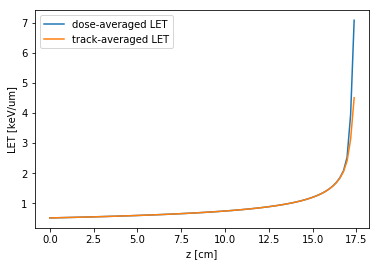

In [7]:
E_MeV = 160
sigma_E_MeV = 0.0
z_cm = np.linspace(start=0.0, stop=20.0, num=100)
let_t_keV_um = WilkensLET.let_t_keV_um(E_MeV, sigma_E_MeV, z_cm)
let_d_keV_um = WilkensLET.let_d_keV_um(E_MeV, sigma_E_MeV, z_cm)

plt.xlabel("z [cm]")
plt.ylabel("LET [keV/um]")
plt.plot(z_cm, let_d_keV_um, label="dose-averaged LET")
plt.plot(z_cm, let_t_keV_um, label="track-averaged LET")
plt.legend(loc=0)

In [8]:
# note !!

# method parabolic_integral in WilkensLET relies on mpmath package, 
# instead of scipy to calculate parabolic cylinder functions,
# 
# scipy could be used, but it fails to calculate exp*Dv product
# when exponent is very small and parabolic cylinder function very large
# mpmath calculation are exact, i.e. 
#
# >>> x = -200
# >>> a = mp.exp(-(x**2)/4)
# >>> b = mp.pcfd(-1/1.77, x)
# >>> a
# mpf('1.1354838653147362e-4343')
# >>> b
# mpf('1.3980110163795251e+4342')
# >>> a*b
# mpf('0.15874189526312063')
#
#  numpy+scipy fails to calculate due to lack of numerical precision
#
# >>> x = -200
# >>> a = np.exp(-(x**2)/4)
# >>> b = sp.special.pbdv(-1/1.77, x)[0]
# >>> a
# 0.0
# >>> b
# inf
# >>> a*b
# __main__:1: RuntimeWarning: invalid value encountered in double_scalars
# nan
#